In [4]:
import sys
sys.path.append('../Anlys_mcs/')
from DensDistAnlys import *
from DiffCaptAnlys_dat import *

/home/wym/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Pospot

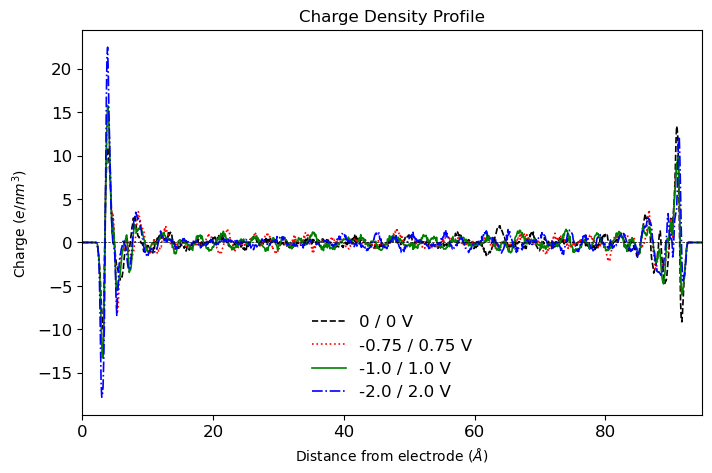

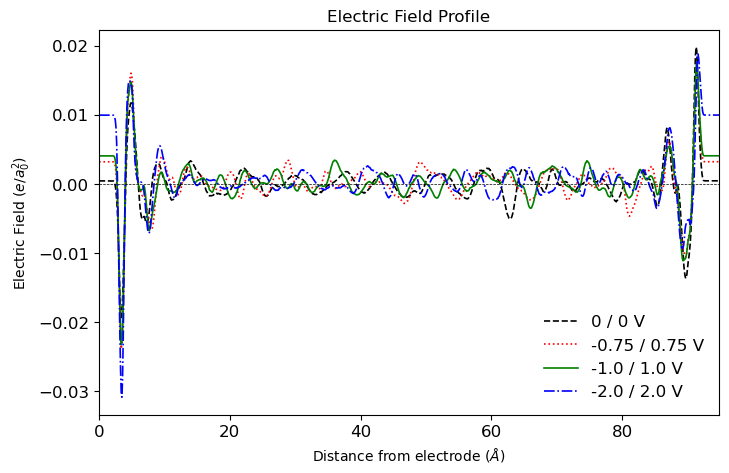

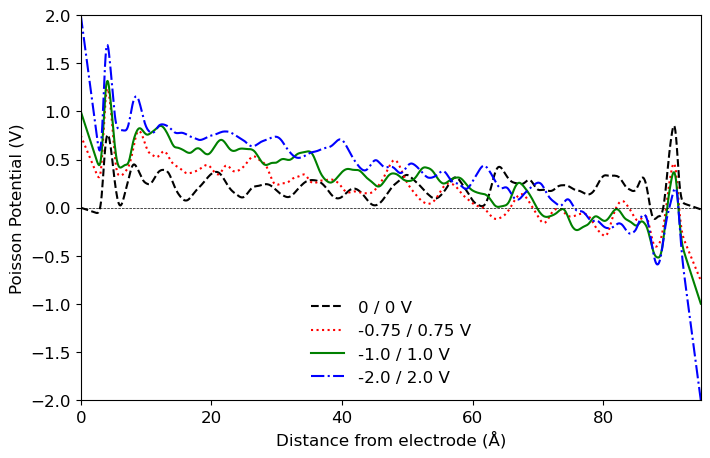

In [8]:
bin_width = 0.1

# V_app = [0, 0.5, 1.5, 2, 3.5, 4]
V_app = [0, 1.5, 2, 4]

# colors = ['g', 'k', 'b', 'r','c']
colors = ['k', 'r', 'g', 'b']
       
# linestyles= ['--', '--', '--', '-', '-', '-', ]
linestyles= ['--', ':', '-', '-.']
    
V_init = [(V_init_i)/2 for V_init_i in V_app ]

fp_cd = [
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v0_ns1000/AnaRes/rho.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v0.5_ns1000/AnaRes/rho.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v1.5_ns1000/AnaRes/rho.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v2_ns1000/AnaRes/rho.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v3.5_ns1000/AnaRes/rho.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v4_ns1000/AnaRes/rho.dat',
]

fp_Efield = [
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v0_ns1000/AnaRes/Efield.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v0.5_ns1000/AnaRes/Efield.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v1.5_ns1000/AnaRes/Efield.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v2_ns1000/AnaRes/Efield.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v3.5_ns1000/AnaRes/Efield.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v4_ns1000/AnaRes/Efield.dat',
]

fp_pospot = [
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v0_ns1000/AnaRes/pospot.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v0.5_ns1000/AnaRes/pospot.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v1.5_ns1000/AnaRes/pospot.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v2_ns1000/AnaRes/pospot.dat',
    # '../sim_output_dir/200[N1888][TFSI]/sim_output_v3.5_ns1000/AnaRes/pospot.dat',
    '../sim_output_dir/200[N1888][TFSI]/sim_output_v4_ns1000/AnaRes/pospot.dat',
]

plot_pospot(fp_cd, fp_Efield, fp_pospot, V_init, bin_width, colors, linestyles)

# C_D

In [1]:
SC_dict= {'v0_cat': 0.2652616685200127, 'v0_an': -0.2712616685204049, 'v0.5_cat': 0.9540805456819854, 'v1.5_cat': 2.0026758380090977, 'v2_cat': 2.5422177942899786, 'v3.5_cat': 5.3178739259177386, 'v4_cat': 6.177155215270774, 'v0.5_an': -0.9600805456823817, 'v1.5_an': -2.0086758380094527, 'v2_an': -2.5482177942903887, 'v3.5_an': -5.323873925918181, 'v4_an': -6.183155215271373}

In [9]:
V_drop_dict={'v0_cat': ([0.0], [-0.17347679744389832], [0.19307290839789973]), 'v0_an': ([-0.016936666728732796], [-0.1904134641726311], [0.19307290839789973]), 'v0.5_cat': ([0.25], [0.022181618071562992], [0.3580287215014773]), 'v0.5_an': ([-0.24947338685052312], [-0.4772917687789601], [0.3580287215014773]), 'v1.5_cat': ([0.75], [0.5289690288290539], [0.4536252796543075]), 'v1.5_an': ([-0.7569857126011462], [-0.9780166837720923], [0.4536252796543075]), 'v2_cat': ([1.0], [0.6777823737855346], [0.34904799580313167]), 'v2_an': ([-0.9971916956260425], [-1.3194093218405079], [0.34904799580313167]), 'v3.5_cat': ([1.75], [1.3417196857952718], [0.3688950974101538]), 'v3.5_an': ([-1.750038655306204], [-2.1583189695109324], [0.3688950974101538]), 'v4_cat': ([2.0], [1.5513199764011294], [0.4258964782955274]), 'v4_an': ([-1.9990898432820212], [-2.4477698668808916], [0.4258964782955274])}

In [ ]:
pdb_v0 = '../sim_output_dir/200[N1888][TFSI]/sim_output_v4_ns1000_charge/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/200[N1888][TFSI]/sim_output_v4_ns1000_charge/FV_NVT.dcd'
u = mda.Universe(pdb_v0, dcd_v0)
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm(np.cross(vec_x, vec_y))  # unit is (angstrom)^2

V_app = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4]  # Extract the voltage levels from SC_dict

# Example voltage drop and charge data
V_drops_pos_N1113 = np.array([V_drop_dict[f'v{V}_cat'][1][0] for V in V_app])  # Extract cathode values from V_drop_dict
V_drops_pos = [V_drops_pos_N1113, V_drops_pos_N1113/2]

V_drops_neg_N1113 = np.array([V_drop_dict[f'v{V}_an'][1][0] for V in V_app])
V_drops_neg = [V_drops_neg_N1113, V_drops_neg_N1113/2]

Q_cat_N1113 = np.array([SC_dict[f'v{V}_cat'] for V in V_app])  # Extract cathode charges from SC_dict
Q_cat = [Q_cat_N1113, Q_cat_N1113/2]

Q_an_N1113 = np.array([SC_dict[f'v{V}_an'] for V in V_app])  # Corrected to use Q_anode_N1113
Q_an = [Q_an_N1113, Q_an_N1113/2]

system_names = ['400 $[N_{1113}^{+}][TFSI^{-}]$']
sys_names = ['400[N1113][TFSI]']
markers=['D']
fmts = ['k-D']
colors = ['k']
ylim_l = 3
ylim_u = 8
output_dir = '../sim_output_dir/C_D of QA/'
filenames = [
    '../sim_output_dir/C_D of QA/400[N1113][TFSI] C_D.log',
]
filenames_std = [
    '../sim_output_dir/C_D of QA/400[N1113][TFSI] C_D_std.log',
]

systems = [dCP(area, V_app, V_drops_pos[i], V_drops_neg[i], Q_cat[i], Q_an[i]) for i in range(len(sys_names))]

plot_Q_surf(systems, system_names, colors)
plot_dCD(systems, filenames, system_names, sys_names, output_dir, markers, colors, ylim_l, ylim_u)
plot_dCD_std(systems, filenames_std, system_names, sys_names, output_dir, fmts, colors, ylim_l, ylim_u)